Lab 5

Kun Lee, partner: Lexie Peterson

Dataset: Higgs, set 1

In [184]:
#Setup
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.signal
from scipy import stats

plt.rcParams["figure.figsize"] = (20,15)

d = stats.norm.rvs(loc = 5., scale = 0.01, size = 100000)
plt.rcParams["figure.figsize"] = (50,50)

import pickle
infile = open("qcd_100000_pt_250_500.pkl",'rb')
qcd = pickle.load(infile)
qcd.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [186]:
infile = open("higgs_100000_pt_250_500.pkl",'rb')
higgs = pickle.load(infile)
higgs.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

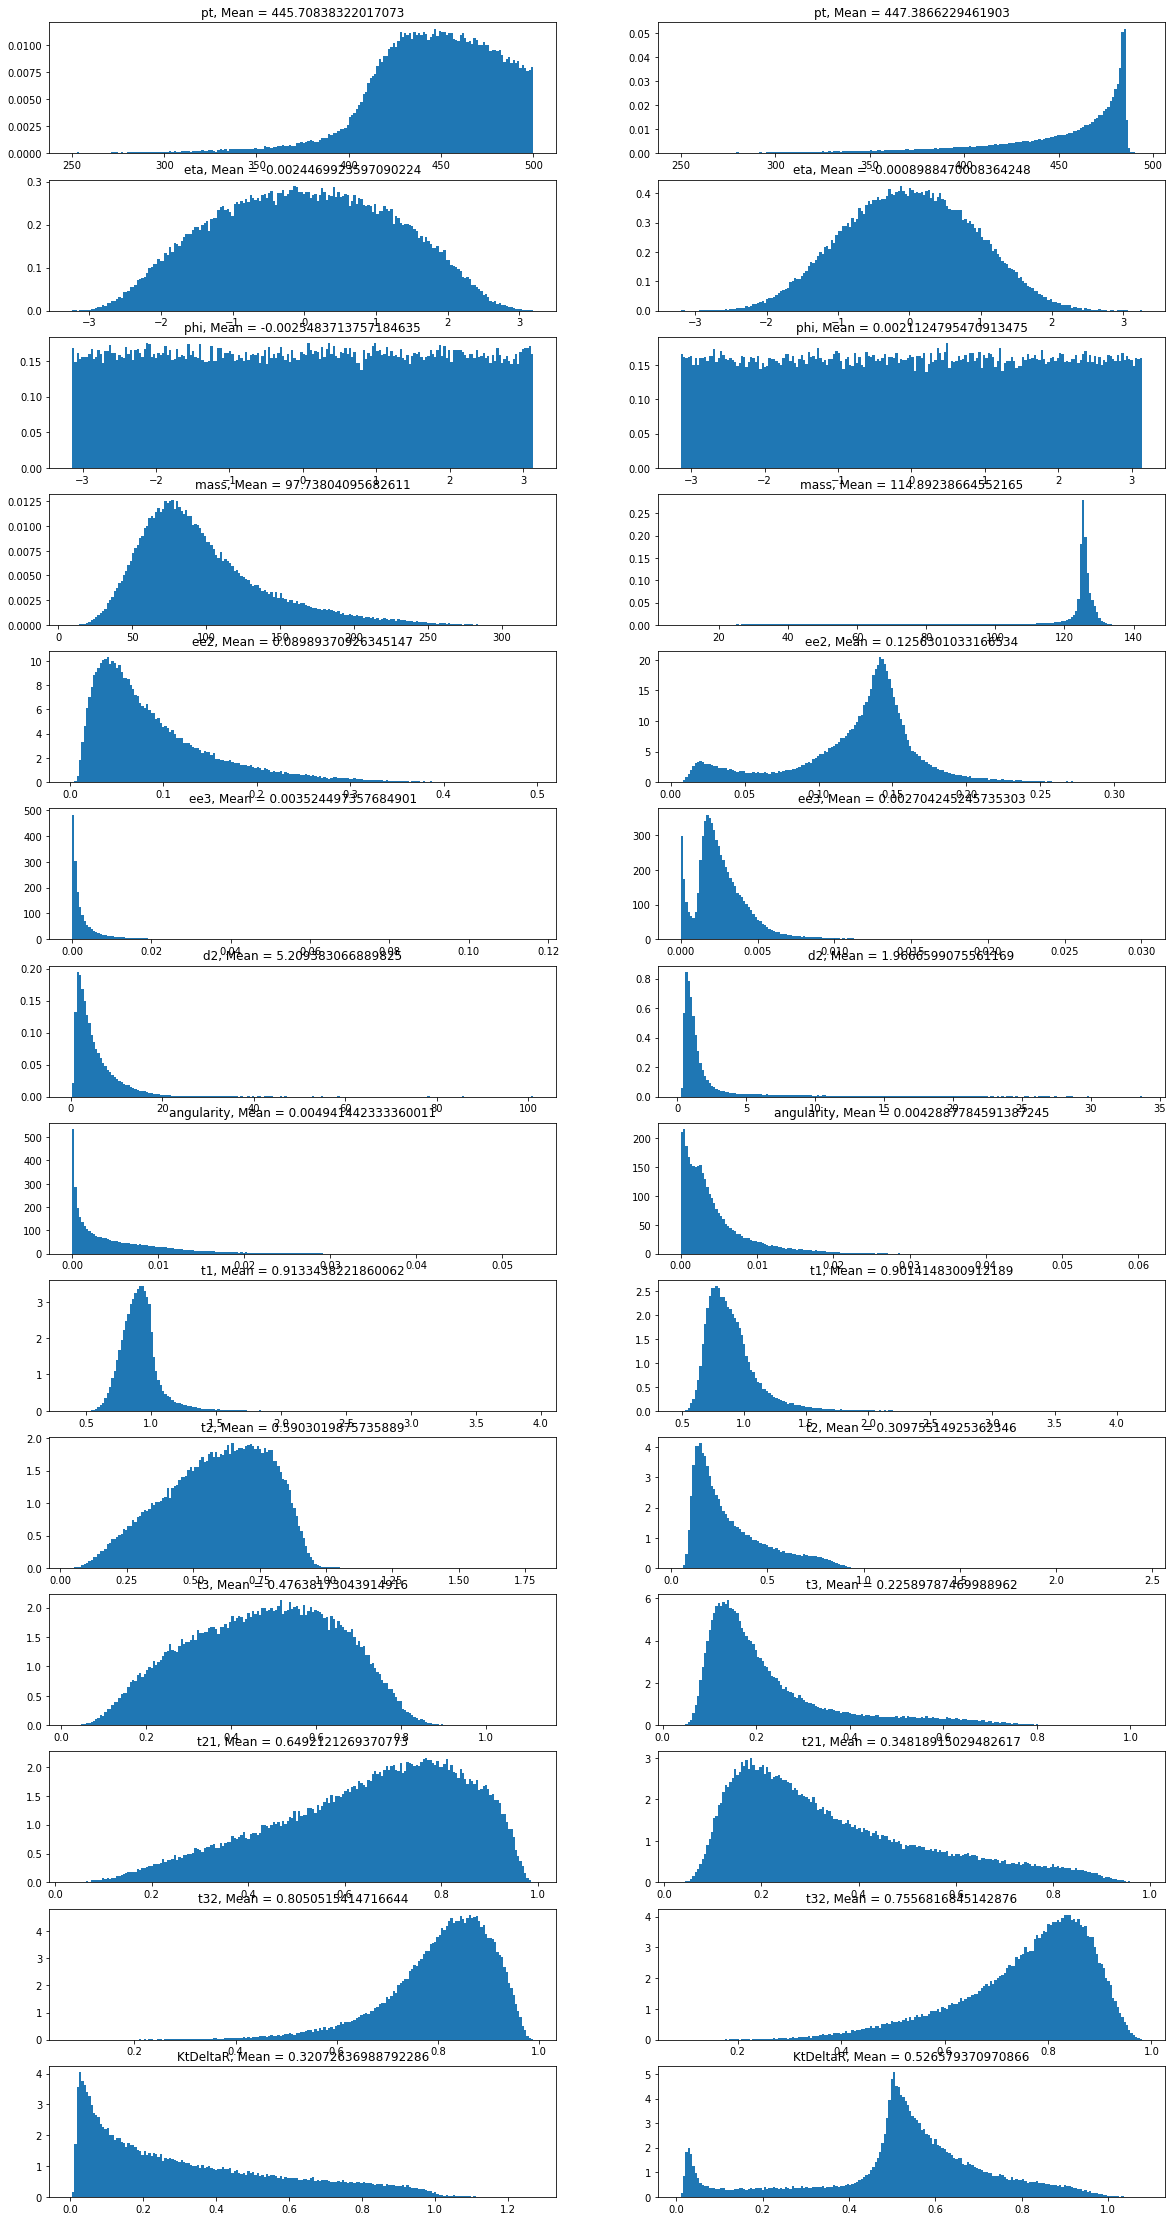

In [209]:
i = 0
fig, ax = plt.subplots(14,2)
for x in higgs.items():
    ax[i][1].hist(x[1], bins=200, density=True)
    ax[i][1].set_title(x[0] + ", Mean = " + str(x[1].mean()))
    i = i + 1
    
i = 0
for x in qcd.items():
    ax[i][0].hist(x[1], bins=200, density=True)
    ax[i][0].set_title(x[0] + ", Mean = " + str(x[1].mean()))
    i = i + 1
fig.set_size_inches(20, 40, forward=True)
plt.show()


Here's a comparison of the 14 features for the background (qcd, on the left), and the signal (higgs, on the right). Let's explore their similarities and differences.

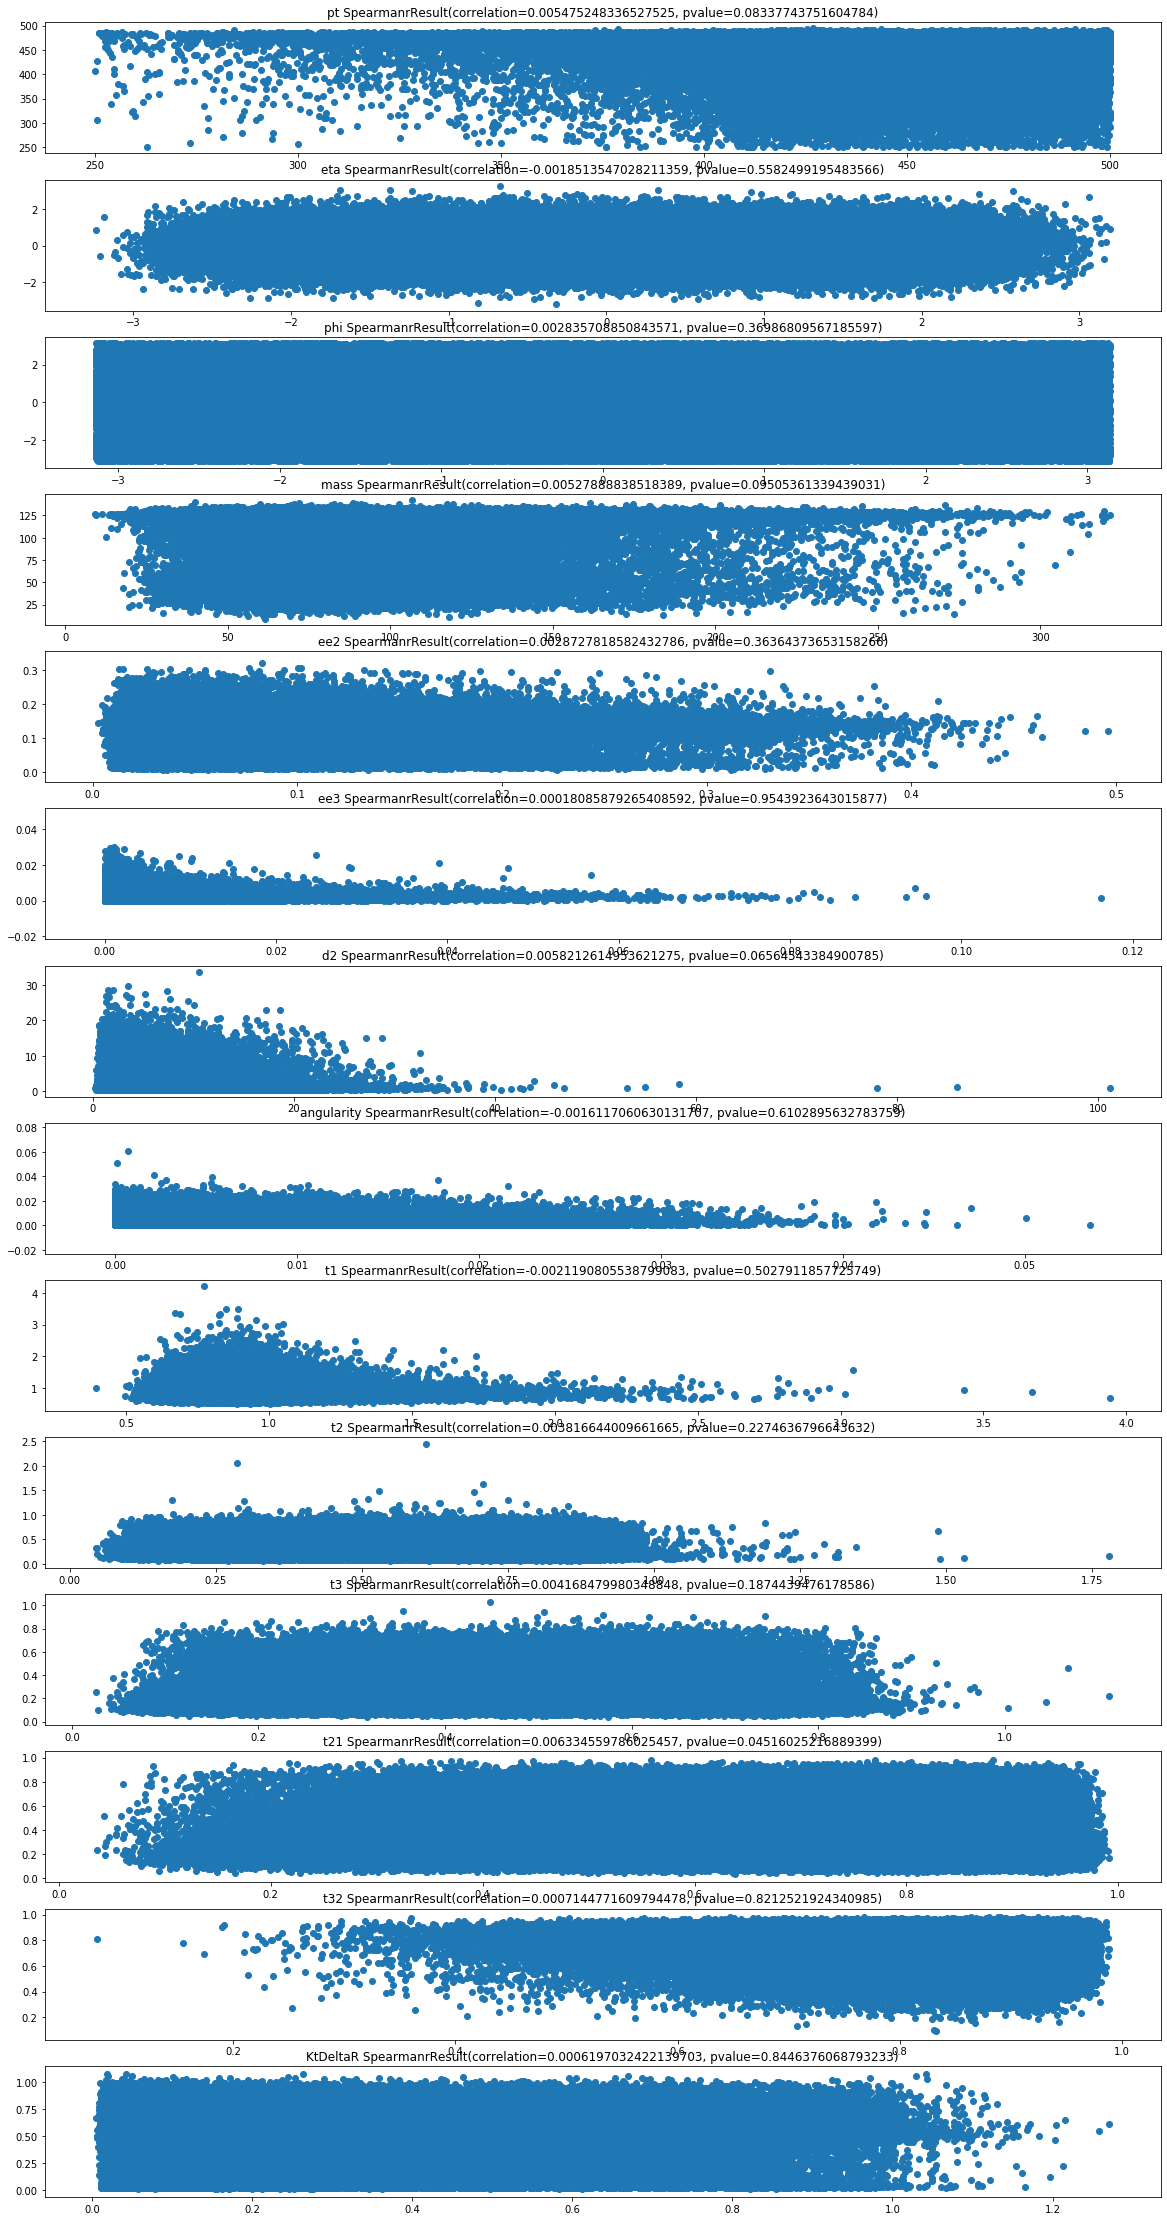

In [125]:
i = 0
fig, ax = plt.subplots(14,1)
for x in higgs.items():
    #print(qcd[x[0]])
    #print(x[1])
    ax[i].scatter(qcd[x[0]], x[1])
    #ax[i].hist(x[1], bins=200,density=True)
    ax[i].set_title(x[0] + " " + str(scipy.stats.spearmanr(x[1],qcd[x[0]])))
    i = i + 1
fig.set_size_inches(20, 40, forward=True)
plt.show()

There seems to be no correlation at this level. But visually some features (e.g. eta) seem very similar, so let's compare the histograms:

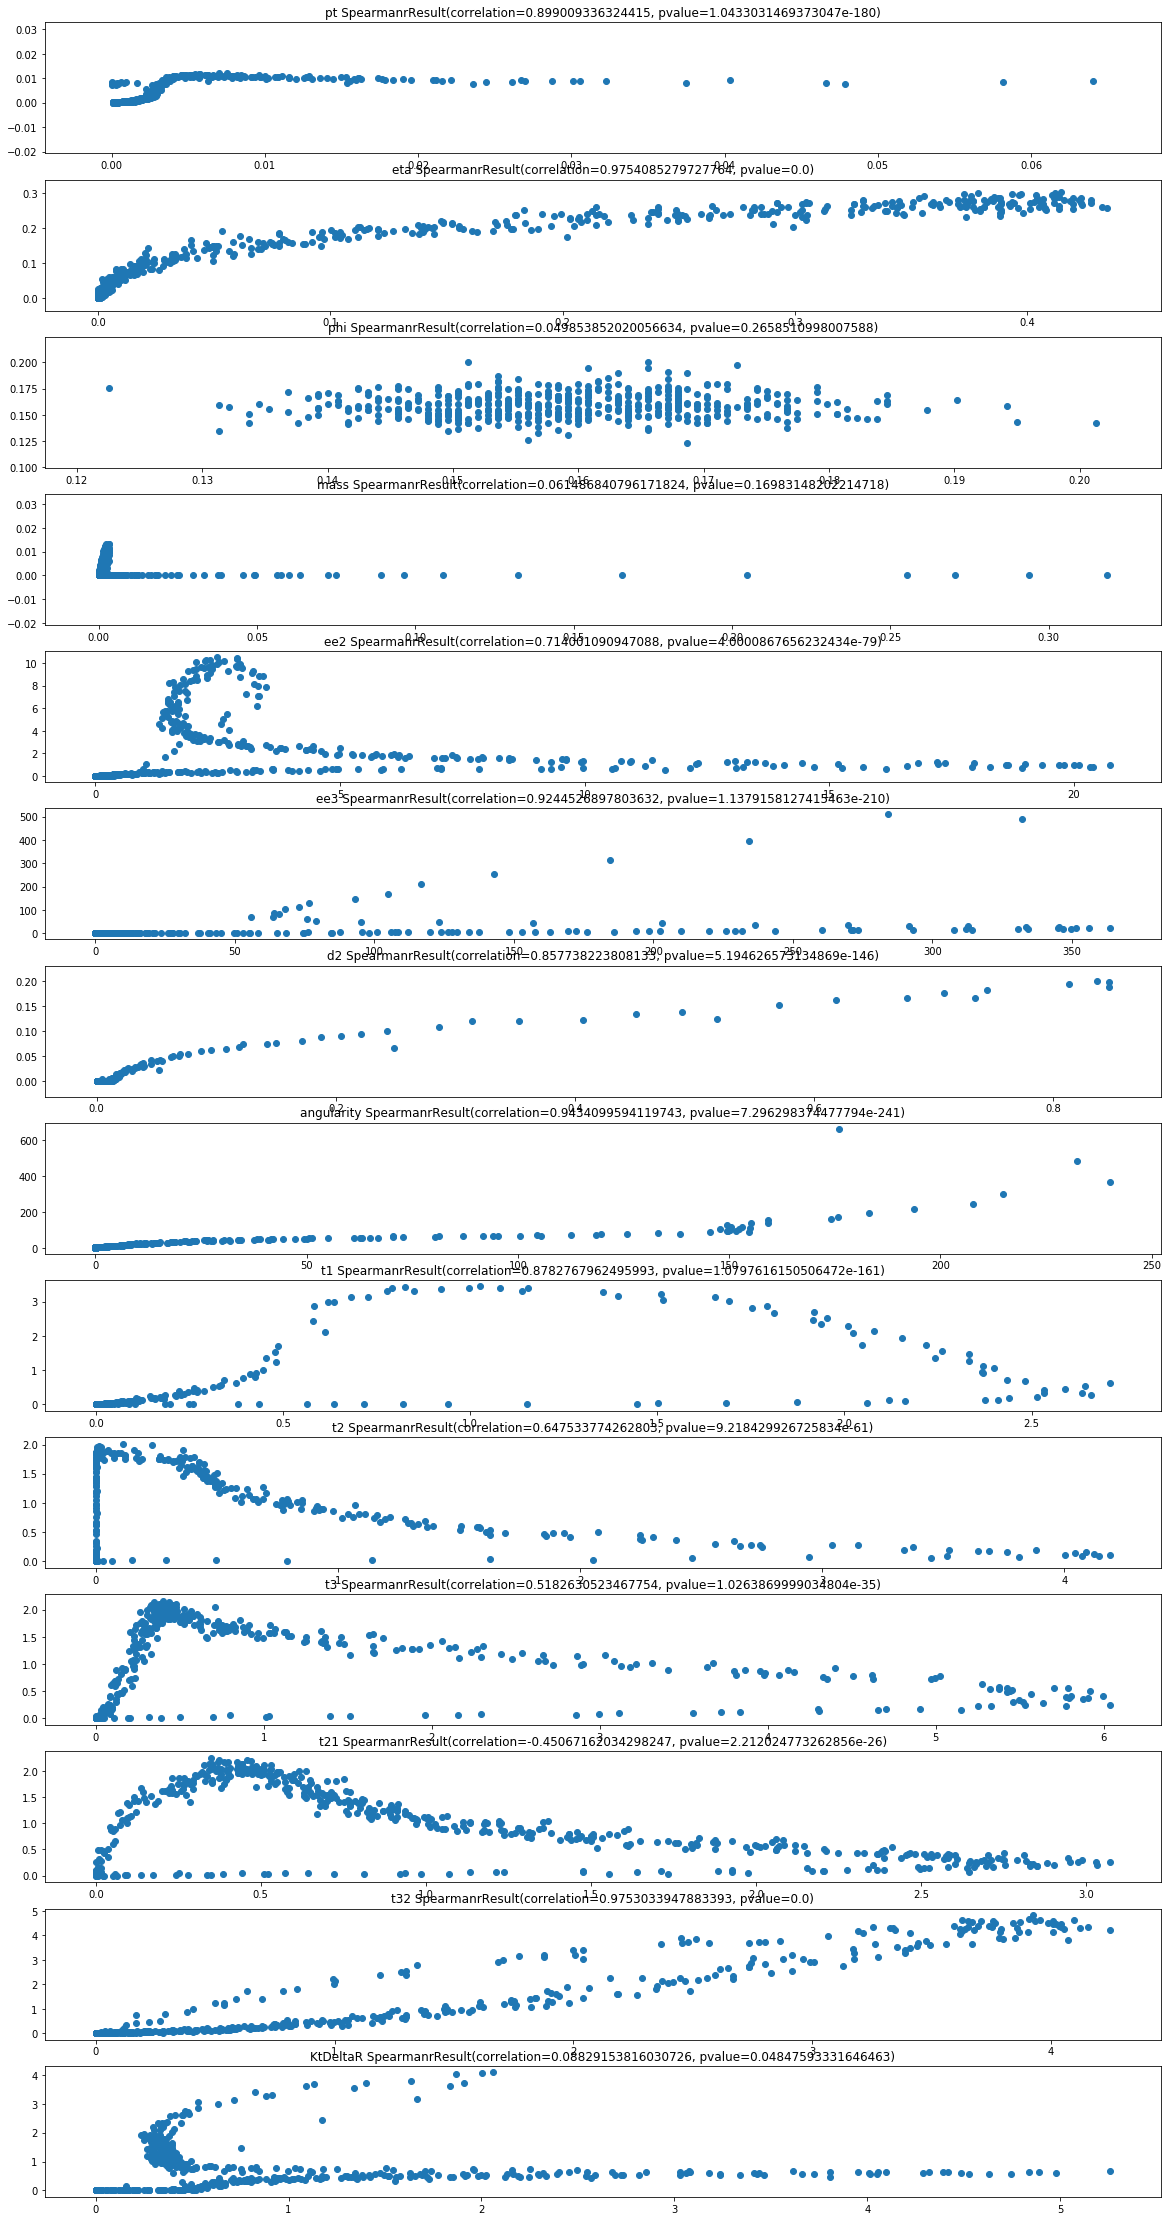

In [153]:
i = 0
fig, ax = plt.subplots(14,1)
import pandas
for x in higgs.items():
    higgs_binned = np.histogram(x[1],bins=500,density=True)
    qcd_binned = np.histogram(qcd[x[0]],bins=500,density=True)
    
    #print(qcd[x[0]])
    #print(x[1])
    ax[i].scatter(higgs_binned[0], qcd_binned[0])
    #ax[i].hist(x[1], bins=200,density=True)
    ax[i].set_title(x[0] + " " + str(scipy.stats.spearmanr(higgs_binned[0],qcd_binned[0])))
    i = i + 1
fig.set_size_inches(20, 40, forward=True)
plt.show()

When comparing the histograms, the Spearman rank correlation coefficient shows that there are some similarities between some features (KtDeltaR, t32, ee3, eta).

>For your lab report, create an initial writeup of your data and what you found. Think of this as a book report, where you describe how the data was taken and what you have found in your initial exploration. The goal is that another student should be able to read your report and understand both the data and any interesting features you have found. This will need to be several pages long.*


https://link.springer.com/content/pdf/10.1140%2Fepjc%2Fs10052-016-3978-z.pdf

This paper gives an overview about how the data is collected, and what each of the 14 features mean. As an overview: 
>The work presented here is the result of a detailed study of a large number of techniques and substructure variables that have, over recent years, been proposed as effective methods for tagging hadronically decaying boosted parti- cles. In 2012, the ATLAS experiment collected 20.3 fb−1 of proton–proton collision data at a centre-of-mass energy of √s = 8 TeV, providing an opportunity to determine which of the many available techniques are most useful for identify- ing boosted, hadronically decaying W bosons. In the studies presented here, jets that contain the W boson decay products are referred to as W-jets.

From what I can gather from that quote, the idea is to create a background (QCD) jet and a Higgs-containing W jet, using different jet grooming algorithms. From there, I suspect the idea is to differentiate the QCD jet from the W jet by comparing the 2 different jets (i.e., the 14 different features we graphed). We will now explore each of these features in turn:

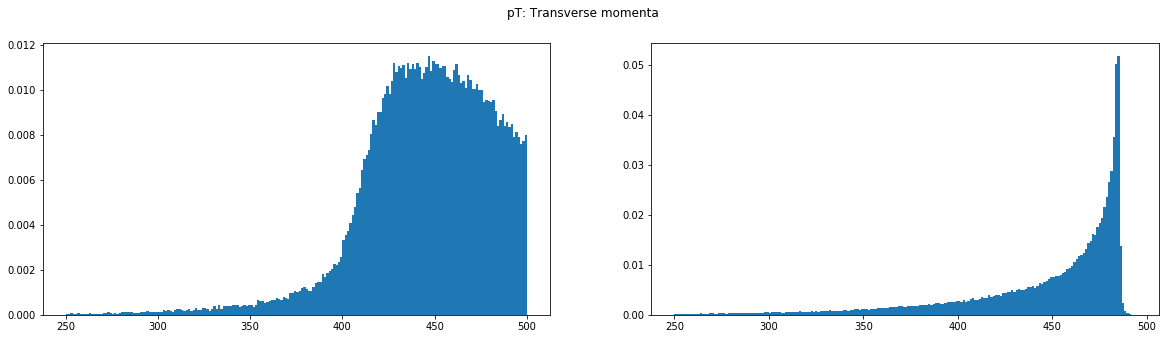

In [249]:
fig, ax = plt.subplots(1,2)
ax[1].hist(higgs['pt'], bins=200, density=True)
plt.suptitle('pT: Transverse momenta')



ax[0].hist(qcd['pt'], bins=200, density=True)

fig.set_size_inches(20, 5, forward=True)
plt.show()

> The pseudorapidity is defined in terms of
the polar angle θ as η = − ln tan θ/2. The transverse momentum is defined as pT = p sin θ = p/ cosh η, and the transverse
energy ET has an analogous definition. https://arxiv.org/pdf/1603.03127.pdf

Here we see that we have transverse momenta between 250 and 500 in both cases, with the signal set having a greater pT than the background set.

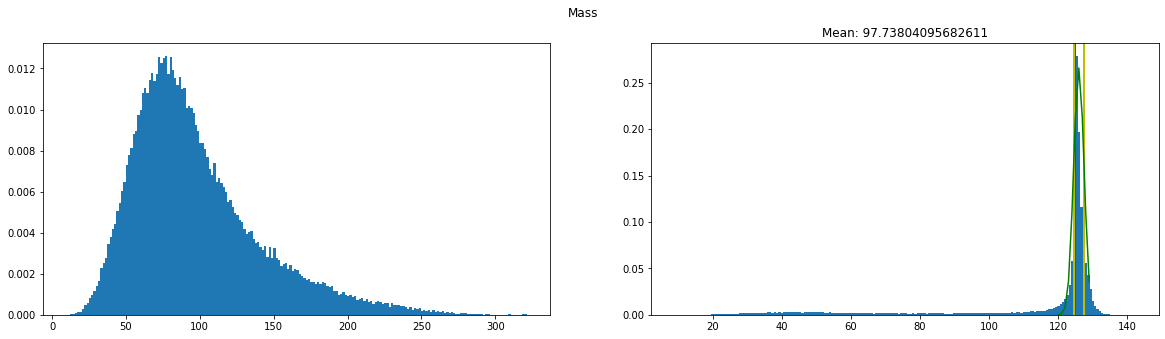

In [227]:
fig, ax = plt.subplots(1,2)
ax[1].hist(higgs['mass'], bins=200, density=True)
plt.suptitle('Mass')
ax[1].set_title('Mean: ' + str(np.mean(higgs['mass'])))
ax[1].axvline(x=125, linewidth=2, color='r')

normal = scipy.stats.norm(loc=126, scale=1.5)
ax[1].axvline(x=127.5, linewidth=2, color='y')
ax[1].axvline(x=124.5, linewidth=2, color='y')
x = range(120,130)
ax[1].plot(x, normal.pdf(x), color='g')

ax[0].hist(qcd['mass'], bins=200, density=True)
ax[1].set_title('Mean: ' + str(np.mean(qcd['mass'])))


fig.set_size_inches(20, 5, forward=True)
plt.show()

From the paper:
>The signal and background mass distributions for a selec-
tion of grooming configurations in the range 200 < pTruth < T
350 GeV are shown in Fig. 2. A Gaussian fit to the W boson mass peak (with the W mass set as the initial condition) is shown. Two alternative signal mass window definitions are considered: 
>1. The 1σ boundaries of the Gaussian fit.
>2. The smallest interval that contains 68 % of the integral.
>Comparing the extent of these two mass windows allows an estimation of how closely the signal mass peak resembles a Gaussian distribution. The W-jet mass is required to be within the boundaries defined by this latter definition of the signal window; this leads, by definition, to a baseline signal efficiencyofεWG =68%forallalgorithms.

The journal article suggests that mass is a very important factor in discriminating between the QCD and the W jets. Like the journal suggested, we did a Gaussian fit (green line) to the W boson mass peak (visually estimated to be at 126 GeV with s.d. 1.5). The yellow lines are the 1 sigma boundaries of the Gaussian fit, and it is evident that the mass peak fits within this 1 sigma boundary. Thus, it is clear that the graph on the right is of a W jet, and not the left one. Interestingly, the Higgs boson has been found to have a mass of 125 GeV (red line), which is right in the middle of the peak of the graph on the right. This makes sense:
>The muon-corrected combined mass described in Section 4 is used to impose the Higgs boson mass requirement and select large-R jets with a mass around the SM Higgs boson mass.

The QCD jet, on the other hand, looks like a Gaussian distribution with a long tail. A possible explanation of that is that the jet grooming algorithms described in the paper will reject a strongly non-Gaussian distribution; a known pathology is if "The signal mass distribution is strongly non-Gaussian". The paper describes the distribution as a linear combination of a Landau and a normal distribution; the former describes the "low mass part of the distribution" and the latter describes the "high mass part of the distribution", which explains the shape of the QCD jet.

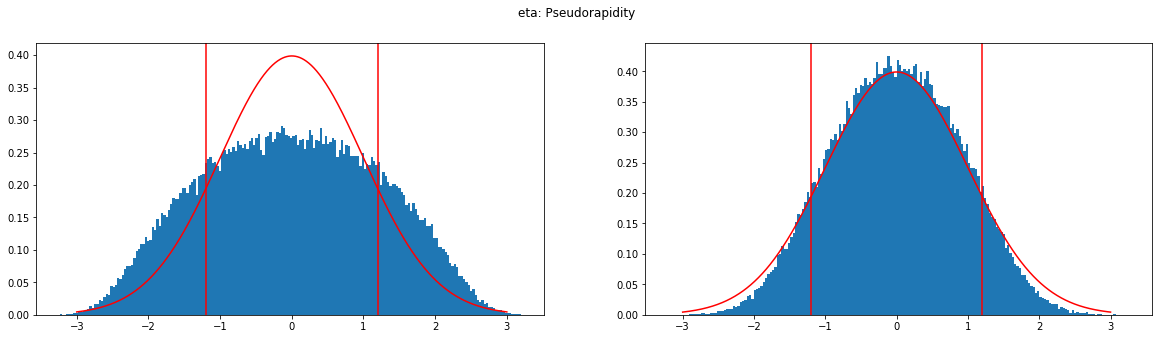

In [246]:
fig, ax = plt.subplots(1,2)
ax[1].hist(higgs['eta'], bins=200, density=True)
plt.suptitle('eta: Pseudorapidity')
ax[1].axvline(x=-1.2, color='r')
ax[1].axvline(x=1.2, color='r')

normal = scipy.stats.norm(loc=0, scale=1)
x = np.linspace(-3,3,1000)
ax[1].plot(x, normal.pdf(x), color='r')

ax[0].plot(x, normal.pdf(x), color='r')
ax[0].hist(qcd['eta'], bins=200, density=True)
ax[0].axvline(x=-1.2, color='r')
ax[0].axvline(x=1.2, color='r')

fig.set_size_inches(20, 5, forward=True)
plt.show()

From the paper:
> The pseudorapidity is defined in terms of the polar angle θ as η = − ln tan(θ /2)

This looks Gaussian, centered around a mean of 0.

In terms of significance, the paper mentions how "At least one trimmed anti-kt , R = 1.0 jet with pT > 200 GeV and |η| < 1.2 is required." So we try superimposing a normal distribution over both jets; the W jet seems to fit a SND rather closely while the QCD jet doesn't.

In [248]:
1 - 2*scipy.stats.norm.cdf(-1.2)

0.7698606595565836

For the W jet, roughly 77% of the particles have |η| < 1.2, which makes sense since the algorithm used in this experiment is a R=1.0 trimming algorithm. (I'm guessing, since the article linked in the lab pdf specifically mentions using this algorithm; I'm not exactly sure if the dataset given to us was based on the same dataset used in the paper.)

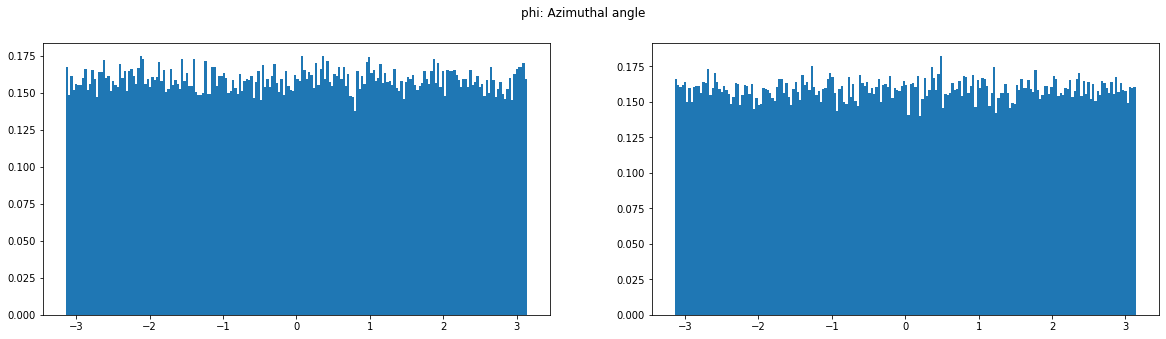

In [251]:
fig, ax = plt.subplots(1,2)
ax[1].hist(higgs['phi'], bins=200, density=True)
plt.suptitle('phi: Azimuthal angle')



ax[0].hist(qcd['phi'], bins=200, density=True)

fig.set_size_inches(20, 5, forward=True)
plt.show()

Phi is the azimuthal angle around the z-axis. It looks random. Together, (eta, phi) (i.e. pseudorapidity and azimuthal angle) describes the space around the jet axis. So I would say that since we have random values for the azimuthal angle, the subjets/substructures are clustered around the axis randomly (i.e. equal chance).

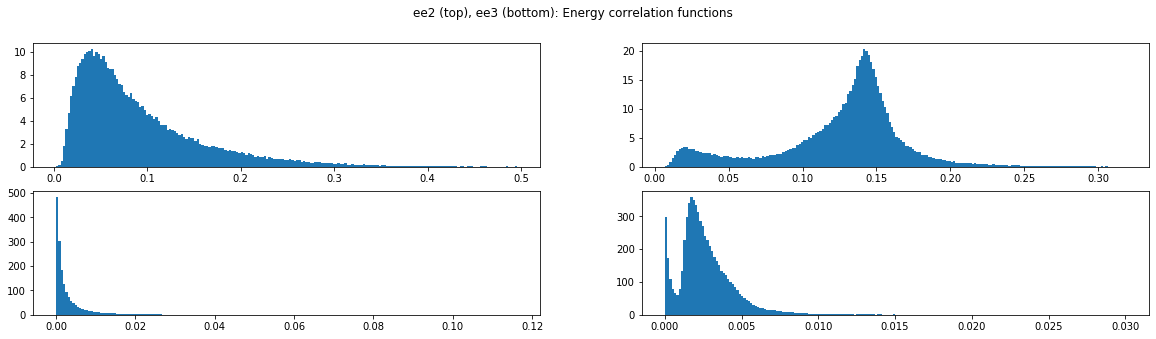

In [258]:
fig, ax = plt.subplots(2,2)
ax[0][1].hist(higgs['ee2'], bins=200, density=True)
plt.suptitle('ee2 (top), ee3 (bottom): Energy correlation functions')
ax[1][1].hist(higgs['ee3'], bins=200, density=True)


ax[0][0].hist(qcd['ee2'], bins=200, density=True)
ax[1][0].hist(qcd['ee3'], bins=200, density=True)
fig.set_size_inches(20, 5, forward=True)
plt.show()

> The 1-point, 2-point and 3-point energy correlation functions for a jet J are given by:
> ECF0(β) = 1,
> ECF1(β) = sum for i in j (pTi),
> ECF2(β) = sum for i < j in J (pTi pTj delta Rij^β)
> ECF3(β) = the same but with an added pTk and Rjk term. 

ee2 and ee3 is then ECF2/ECF1 and ECF3/ECF1 respectively.
Apparently this is useful in calculating the dimensionless variable C2, which the paper says is useful in identifying two-body structures within jets. Based on my naive interpretation, there are 2 local maxima in the W jet but only 1 in the QCD jet, so maybe 2 body structure = 2 peaks.

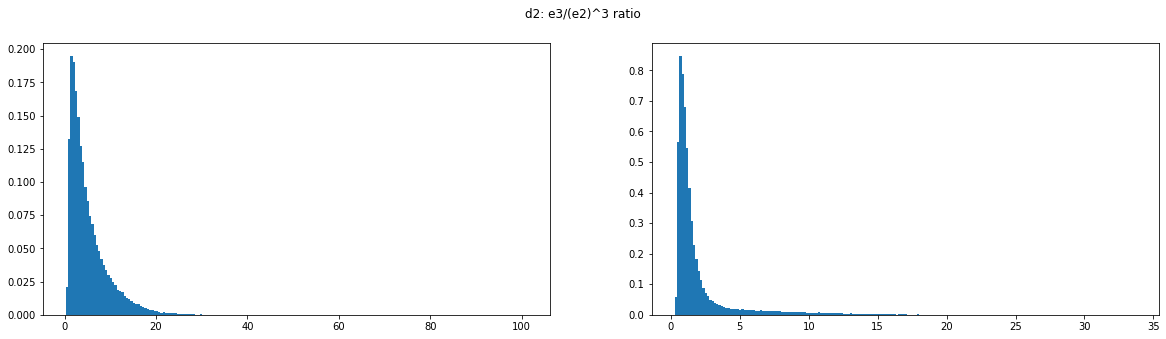

In [259]:
fig, ax = plt.subplots(1,2)
ax[1].hist(higgs['d2'], bins=200, density=True)
plt.suptitle('d2: e3/(e2)^3 ratio')



ax[0].hist(qcd['d2'], bins=200, density=True)

fig.set_size_inches(20, 5, forward=True)
plt.show()

d2, according to the paper, is simply the e3 divided by the cube of the e2.

From this other paper https://arxiv.org/pdf/1409.6298.pdf:
>Signal jets will be characterized by a small value of D(β), while background jets will pre-dominantly have large D2 . 

This is clear from the graph: while they have the same shape, the x-axis values are markedly different and are smaller for the W jet.

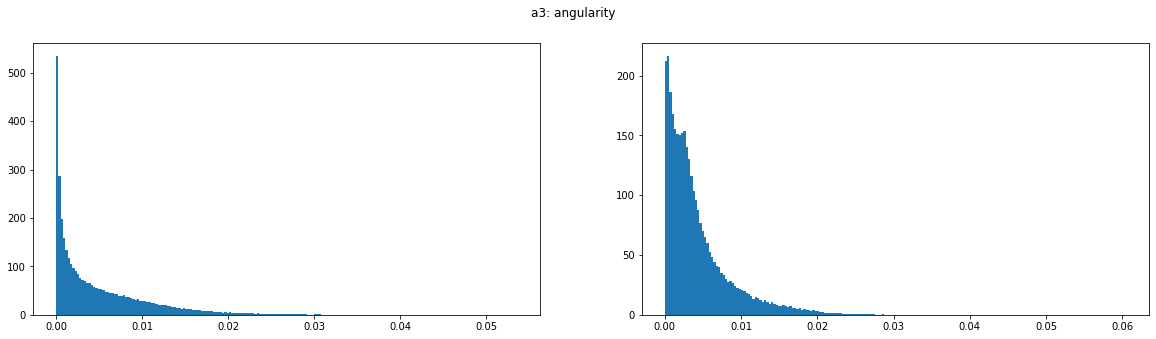

In [263]:
fig, ax = plt.subplots(1,2)
ax[1].hist(higgs['angularity'], bins=200, density=True)
plt.suptitle('a3: angularity')



ax[0].hist(qcd['angularity'], bins=200, density=True)

fig.set_size_inches(20, 5, forward=True)
plt.show()

> The angularity, a3, distribution is expected to peak
sharply at values close to zero for a balanced two-body decay, such as that of a W boson, while a broader tail is expected for jets initiated by quarks and gluons.

This paper https://arxiv.org/pdf/hep-ph/0407024.pdf gives the precise definition of the angularity, the formula for which is too complicated to copy/paste over here.

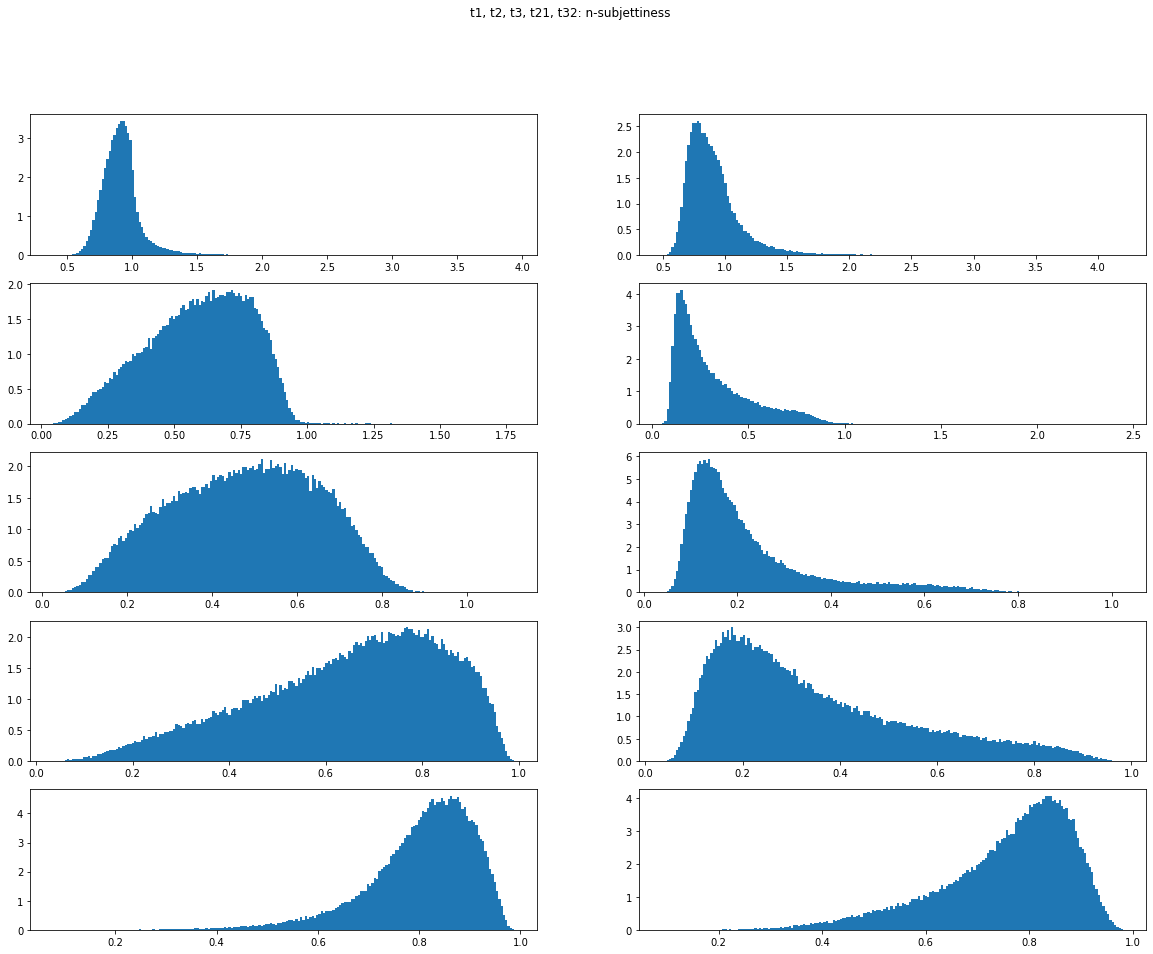

In [266]:
fig, ax = plt.subplots(5,2)
ax[0][1].hist(higgs['t1'], bins=200, density=True)
plt.suptitle('t1, t2, t3, t21, t32: n-subjettiness')
ax[1][1].hist(higgs['t2'], bins=200, density=True)
ax[2][1].hist(higgs['t3'], bins=200, density=True)
ax[3][1].hist(higgs['t21'], bins=200, density=True)
ax[4][1].hist(higgs['t32'], bins=200, density=True)


ax[0][0].hist(qcd['t1'], bins=200, density=True)
ax[1][0].hist(qcd['t2'], bins=200, density=True)
ax[2][0].hist(qcd['t3'], bins=200, density=True)
ax[3][0].hist(qcd['t21'], bins=200, density=True)
ax[4][0].hist(qcd['t32'], bins=200, density=True)
fig.set_size_inches(20, 15, forward=True)
plt.show()

From the paper:
>The “N-subjettiness” [23,24] jet shape variables describe
to what degree the substructure of a given jet J is compatible with being composed of N or fewer subjets.

This paper https://arxiv.org/pdf/1011.2268.pdf states that this is useful in distinguishing between QCD and W jets:
>Boosted hadronic objects have a fundamentally different energy pattern than QCD jets of comparable invariant mass. For concreteness, we will consider the case of a boosted W boson as shown in Fig. 1, though a similar discussion holds for boosted top quarks or new physics objects. Since the W decays to two quarks, a single jet containing a boosted W boson should be composed of two distinct—but not necessarily easily resolved—hard subjets with a combined invariant mass of around 80 GeV. A boosted QCD jet with an invariant mass of 80 GeV usually originates from a single hard parton and acquires mass through large angle soft splittings. We want to exploit this difference in expected energy flow to differentiate between these two types of jets by “counting” the number of hard lobes of energy within a jet.

To simplify, W jets have 2 hard lobes within the jet but QCD jets have more (specifically, the paper says they "acquire invariant mass through multiple splittings").

The paper helpfully elaborates:
>It is straightforward to see that τN quantifies how N-subjetty a particular jet is, or in other words, to what degree it can be regarded as a jet composed of N subjets.
>Jets with τN ≈ 0 have all their radiation aligned with the candidate subjet directions and therefore have N (or fewer) subjets.

Which of these values are relevant in identifying W jets?
>Less obvious is how best to use τN for identifying boosted W bosons. While one might naively expect that an event with small τ2 would be more likely to be a W jet, observe that QCD jet can also have small τ2, as shown in Fig. 2(b). Similarly, though W jets are likely to have large τ1, QCD jets with a diffuse spray of large angle radiation can also have large τ1, as shown in Fig. 2(a). However, those QCD jets with large τ1 typically have large values of τ2 as well, so it is in fact the ratio τ2/τ1 which is the preferred discriminating variable. As seen in Fig. 3(a), W jets have smaller τ2/τ1 values than QCD jets. 

Long story short, W jets have a smaller t21 than QCD jets. T21 in our dataset is the value of t2/t1, and the t21 graph (4th from the top) illustrates this neat fact.

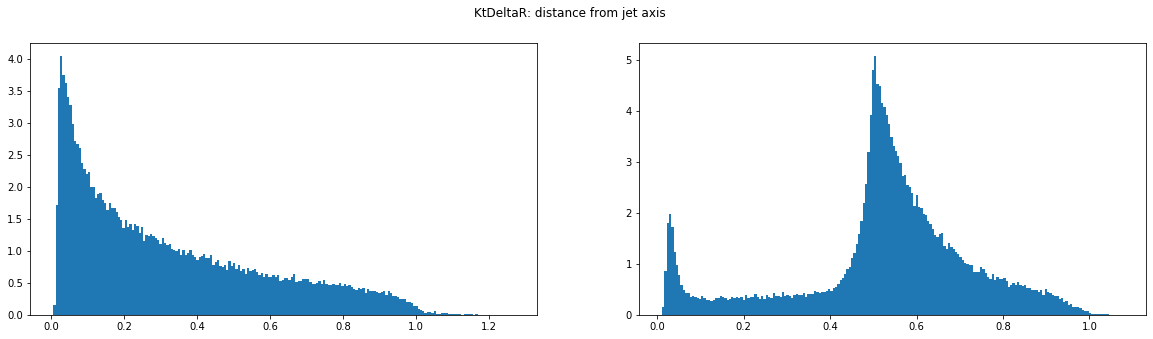

In [269]:
fig, ax = plt.subplots(1,2)
ax[1].hist(higgs['KtDeltaR'], bins=200, density=True)
plt.suptitle('KtDeltaR: distance from jet axis')



ax[0].hist(qcd['KtDeltaR'], bins=200, density=True)

fig.set_size_inches(20, 5, forward=True)
plt.show()

Lastly, we have the KtDeltaR where the DeltaR refers to:
>the distance 􏰀R refers to the distance between con- stituent i and the jet axis.

In the explanation of the n-subjettiness, the paper mentioned how the W jets have 2 hard lobes around the axis, but QCD jets have multiple. Based on my interpretation, it looks like the graph of the W jets indicate 2 peaks (2 lobes) at distinct distances from the jet axis, but the QCD jet doesn't have 2 peaks; it only has 1 close to 0. This is consistent with how the QCD jet breaks down into many lobes, which cluster around the jet axis and which may not necessarily occur at any specific distance.